In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from metpy.plots import USCOUNTIES
import geopandas
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime, date
from dateutil import tz
import glob

%matplotlib inline

Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.


In [2]:
# Read in Shapefile
d = date.today()
date = f'{d:%d}'
month = f'{d:%m}'
year = f'{d:%Y}'

qpf = geopandas.read_file(glob.glob(f'data/day13_{year}{month}{date}*.shp')[0])

In [3]:
# Set Coordinate Reference System for the map
map_crs = ccrs.Mercator()

# Set Coordinate Reference System from the Shapefile Data
data_crs = ccrs.PlateCarree()

In [4]:
# Set colors
qpf_cmap = {'0.01': '#80ff00',
            '0.10': '#00cd00',
            '0.25': '#008b00',
            '0.50': '#104e8b',
            '0.75': '#1e8fff',
            '1.00': '#00b2ee',
            '1.25': '#00eeee',
            '1.50': '#8968cd',
            '1.75': '#912cee',
            '2.00': '#8b008b',
            '2.50': '#8b0000',
            '3.00': '#cd0000',
            '4.00': '#ee3f00',
            '5.00': '#ff8000',
            '7.00': '#cd8500',
            '10.00': '#ffd900',
            '15.00': '#ffff00',
            '20.00': '#ffaeb9'}

# Generate legend patches
legend_patches = []
for val in qpf_cmap.keys():
   patch = mpatches.Patch(color=qpf_cmap[val], label=val)
   legend_patches.append(patch)

In [5]:
# Get time data
start_time = qpf['START_TIME'][0]
end_time = qpf['END_TIME'][0]

from_zone = tz.gettz('UTC')
to_zone = tz.gettz('America/New_York')

def get_valid_day(string):
    utc_time = datetime.strptime(string, '%Y-%m-%d %H:%M:%S').replace(tzinfo=from_zone)
    eastern = utc_time.astimezone(to_zone)
    valid_day = datetime.strftime(eastern, '%A').lstrip('0').replace(' 0', ' ')
    return valid_day

valid_day_start = get_valid_day(start_time)
valid_day_end = get_valid_day(end_time)

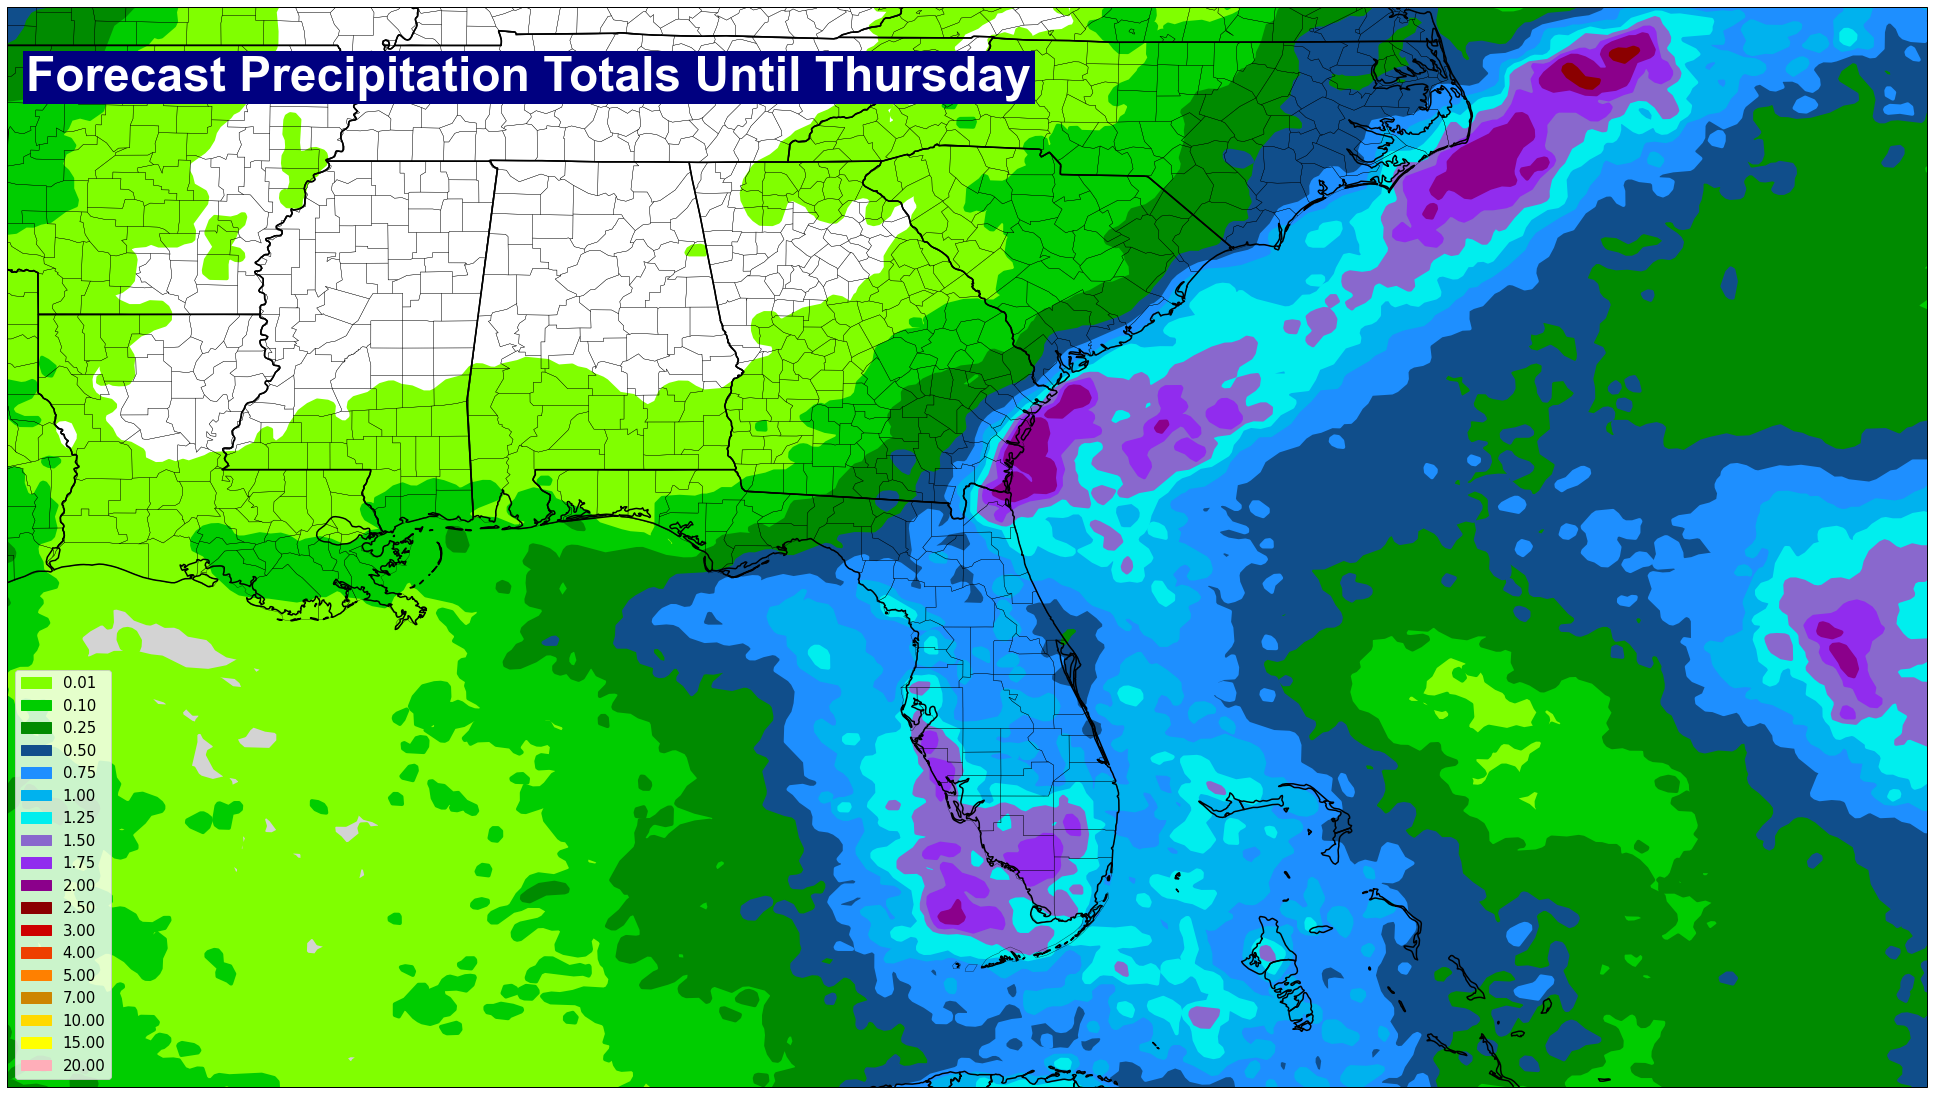

In [6]:
# Setup matplotlib figure
fig = plt.figure(figsize=(1920/72, 1080/72))
ax = fig.add_axes([0, 0, 1, 1], projection=data_crs)

ax.set_extent([-89, -75, 23, 37], data_crs)
ax.set_adjustable('datalim')


#FL
#ax.set_extent([-92, -77, 24.5, 31.5], ccrs.PlateCarree())
#ax.set_extent([-89, -80, 28.5, 31.5], ccrs.PlateCarree())

#SC
#ax.set_extent([-85, -78, 31.5, 35.5], ccrs.PlateCarree())

# Setup borders (states, countries, coastlines, etc)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax.add_feature(cfeature.OCEAN.with_scale('10m'), color='lightgray')
ax.add_feature(USCOUNTIES.with_scale('20m'), edgecolor='black', zorder=5, linewidth=0.3)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=1.5, zorder=10)


for key in qpf_cmap:
    geometries = qpf[qpf['QPF'] == float(key)]
    ax.add_geometries(geometries['geometry'], crs=data_crs, facecolor=qpf_cmap[key], edgecolor=qpf_cmap[key], linewidth=4, zorder=2, alpha=1.0)
    

# Plot the legend
plt.legend(handles=legend_patches, fontsize=15, loc='lower left',)

# Set title
ax.set_title(f'Forecast Precipitation Totals Until {valid_day_end}', loc='left', 
             ha='left', va='top', fontsize=48, color='white', 
             fontweight='bold', fontname='Arial', y=0.95, x=0.01, zorder=11,
             bbox=dict(facecolor='navy', alpha=1.0, edgecolor='none'))

graphics_dir = Path('.') / '..' / '..' / 'graphics' / 'wpc'
plt.savefig(f'{graphics_dir}/qpf_day1to3.png', dpi=72)

<Figure size 432x288 with 0 Axes>